# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

#### 1.2. Проектируем архитектуру для этой задачи

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import pickle

mms = MinMaxScaler()

X_train_n = mms.fit_transform(X_train)
X_test_n = mms.transform(X_test)

with open("scaler.pkl", "wb") as f:
    pickle.dump(mms, f)

model = Sequential([
    Dense(16, input_shape=(13,), activation='relu'),
    # Dense(12, activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                224       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [ ]:
from keras.optimizers import Adam

model.compile(Adam(learning_rate=0.05), loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(patience=5)
# checkpoint = ModelCheckpoint(filepath="best_model.h5",
#                              monitor="mae",
#                              save_best_only=True,
#                              verbose=0)

H = model.fit(X_train_n, y_train, epochs=200, validation_data=(X_test_n, y_test))

Epoch 1/200
12/12 [==============================] - 1s 19ms/step - loss: 438.1360 - mae: 18.3535 - val_loss: 168.1736 - val_mae: 10.2466
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 152.8833 - mae: 9.7549 - val_loss: 102.3113 - val_mae: 7.5675
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 96.3716 - mae: 7.4184 - val_loss: 72.9936 - val_mae: 5.7867
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 64.0753 - mae: 5.8005 - val_loss: 60.1615 - val_mae: 5.5206
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 52.1217 - mae: 5.1701 - val_loss: 62.6408 - val_mae: 5.1959
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 47.8920 - mae: 4.8506 - val_loss: 58.0688 - val_mae: 5.3453
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 43.4783 - mae: 4.7903 - val_loss: 54.6117 - val_mae: 4.8971
Epoch 8/200
12/12 [==============================] - 0s 7ms/st

#### 1.6. Делаем предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test)
X_test

4/4 [==============================] - 0s 4ms/step


array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [3.4940e-01, 0.0000e+00, 9.9000e+00, ..., 1.8400e+01, 3.9624e+02,
        9.9700e+00],
       [9.8490e-02, 0.0000e+00, 2.5650e+01, ..., 1.9100e+01, 3.7938e+02,
        1.7580e+01],
       [7.5030e-02, 3.3000e+01, 2.1800e+00, ..., 1.8400e+01, 3.9690e+02,
        6.4700e+00]])

#### 1.7. Вычисляем метрику качества на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(preds, y_test)
print(error)

5972.796216781495


#### 1.8. Строим график обучения

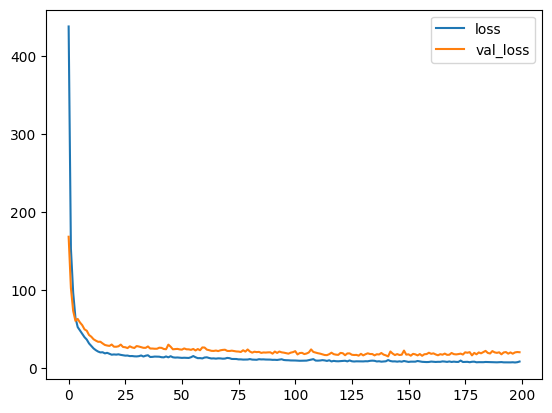

In [ ]:
import matplotlib.pyplot as plt

plt.plot(H.history["loss"], label="loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [ ]:
import gradio as gr

def preprocess_input(features, scale_model="scaler.pkl"):
  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

def predict_price(*features):
  try:
    features = preprocess_input(features)

    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return prediction[0][0]

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="ZN", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="INDUS", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="CHAS", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="NOX", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="RM", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="AGE", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="DIS", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="RAD", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="TAX", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="PTRATIO", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="B", minimum=0, maximum=1000000, step=0.1, value=0),
        gr.Slider(label="LSTAT", minimum=0, maximum=1000000, step=0.1, value=0),
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f83e69d50c8d45c920.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#### 2. Проверка обученной модели пользовательскими данными

In [ ]:
custom_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
prediction = predict_price(*custom_features)[0][0]

[[ 0.01116872  0.02        0.0931085   4.          9.49588477  0.46733091
   0.04222451  0.62322982  0.34782609 -0.33778626 -0.17021277  0.02945181
   0.31971631]]


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [82]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [83]:
#https://www.kaggle.com/models/google/gemma/frameworks/keras

! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.ru/d/-l7kvshyW9eYGA) -o archive.zip
! unzip -o -qq archive.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 34.0M  100 34.0M    0     0  6364k      0  0:00:05  0:00:05 --:--:-- 9919k


### 3. Указываем путь к набору данных:

In [86]:
import glob

image_paths = []
for folder_path in glob.glob('/content/pc_parts/*'):
    image_paths.extend(glob.glob(folder_path + '/*.jpg'))

random.shuffle(sorted(image_paths))

### 4. Загружаем набор данных и формируем общую выборку:

In [87]:
def load_images(imagePaths, compression_size = 32):

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [ ]:
compression_size = 32
data, labels = load_images(image_paths,  32)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [90]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [91]:
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [92]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

print(Y_train.shape, Y_val.shape)
print(X_train.shape, X_val.shape)

(2459, 14) (820, 14)
(2459, 3072) (820, 3072)


### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [93]:
input_shape = (compression_size * compression_size * 3,)

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [94]:
model = Sequential()
model.add(Dense(3072, input_shape=input_shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.3. Компилируем модель:

In [95]:
INIT_LR = 0.00005
EPOCHS = 100

opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [96]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности


#### 6.2. Запустим процесс обучения модели:

In [97]:
H = model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint]
              )

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 2.6359 - accuracy: 0.0895

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 12s 476ms/step - loss: 2.6359 - accuracy: 0.0895 - val_loss: 2.6340 - val_accuracy: 0.0890
Epoch 2/100
25/25 [==============================] - 12s 486ms/step - loss: 2.6282 - accuracy: 0.0915 - val_loss: 2.6295 - val_accuracy: 0.0890
Epoch 3/100
25/25 [==============================] - 8s 314ms/step - loss: 2.6199 - accuracy: 0.0915 - val_loss: 2.6249 - val_accuracy: 0.0890
Epoch 4/100
25/25 [==============================] - 6s 227ms/step - loss: 2.6118 - accuracy: 0.0915 - val_loss: 2.6212 - val_accuracy: 0.0890
Epoch 5/100
25/25 [==============================] - 7s 282ms/step - loss: 2.6047 - accuracy: 0.0919 - val_loss: 2.6184 - val_accuracy: 0.0915
Epoch 6/100
25/25 [==============================] - 8s 341ms/step - loss: 2.5993 - accuracy: 0.0948 - val_loss: 2.6158 - val_accuracy: 0.0951
Epoch 7/100
25/25 [==============================] - 7s 292ms/step - loss: 2.5940 - accuracy: 0.0988 - val_loss: 2.6126 - val_accuracy: 0.1171
Epoch 8/1

#### 6.3. Загружаем лучшую модель:

In [98]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [99]:
predictions = model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

26/26 [==============================] - 1s 32ms/step
              precision    recall  f1-score   support

      cables       0.17      0.22      0.19        73
        case       0.19      0.39      0.26        69
         cpu       0.00      0.00      0.00        50
         gpu       0.00      0.00      0.00        37
         hdd       0.16      0.24      0.19        62
     headset       0.26      0.30      0.28        54
    keyboard       0.09      0.09      0.09        55
  microphone       0.32      0.29      0.30        55
     monitor       0.22      0.27      0.24        60
 motherboard       0.14      0.10      0.12        61
       mouse       0.13      0.07      0.10        54
         ram       0.10      0.05      0.07        56
    speakers       0.31      0.42      0.36        90
      webcam       0.57      0.36      0.44        44

    accuracy                           0.22       820
   macro avg       0.19      0.20      0.19       820
weighted avg       0.19   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 7.2. Выведем матрицу ошибок

26/26 [==============================] - 3s 95ms/step


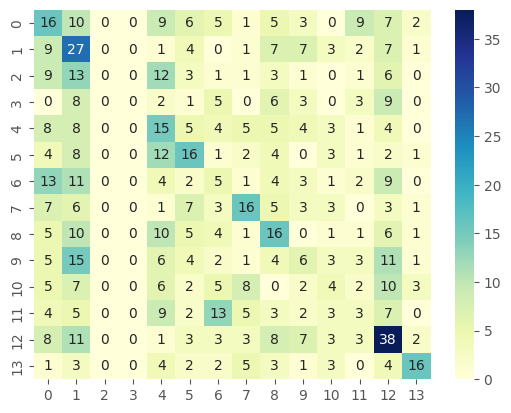

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

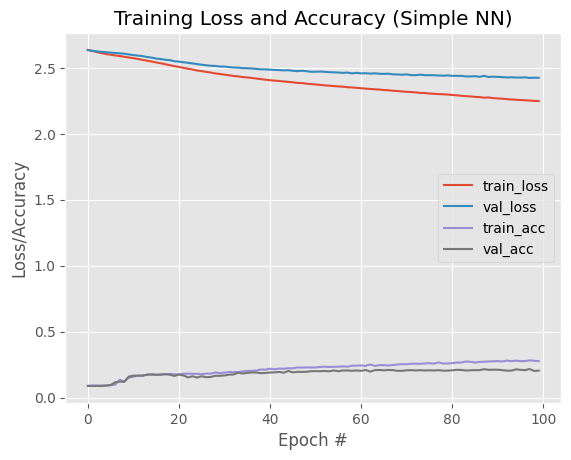

In [102]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### 8. Сохранение модели и меток классов:

In [103]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [104]:
model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [105]:
!pip install gradio

In [106]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [107]:
def preprocess_image(img, compression_size = 32):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [108]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/card.jpg",
              "/content/proc.jpg"
              ])

# Запускаем интерфейс
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://553a0daca045921c4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 60ms/step
